# k_means颜色聚类

### k_means聚类算法的思想比较简单，主要步骤如下
### 1.确定k个聚类中心
### 2.循环遍历每个样本点，计算样本点与各个聚类中心的距离，选出最小距离的一类，将该样本点划分为该类的聚类
### 3.所有样本遍历完成之后，重新计算各类的聚类中心
#### （1）若聚类中心与上次聚类中心相同，则说明收敛过程结束，该k个聚类即为最后聚类结果
#### （2）若积累中心与上次聚类中心不同，则说明还应该继续收敛，应继续执行步骤2

## 在图像颜色聚类上，传统的空间欧氏距离则为像素的颜色距离（像素各个通道的差值），各个聚类的中心则为该类像素的颜色均值

In [3]:
#加载需要的库
import cv2
import numpy as np
import matplotlib.pyplot as plt #方便在jupyter中显示图像

In [21]:
#########定义一个k_means图片分类器
class KM_IMG:
    
    # 初始化构造函数
    def __init__(self, img_name):
        self.img = cv2.imread(img_name) #加载原始图片
        self.img_rgb = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB) #将图片格式转换成rgb通道
        self.height, self.width, self.channels = self.img.shape # 返回图片的高，宽，和通道数
        self.list_center = [] #设置存放聚类中心的列表
        self.dict_label_position = {} #用以保存每一类的像素点位置
        
    # 随机生成聚类中心函数
    def rand_center(self, k):
        self.list_center = [] #设置存放聚类中心的列表
        for i in range(0,k):
            np.random.seed(i+1) #设置随机种子，是每次产生的随机数相同
            #[r, g, b] = np.random.randint(0, 255, self.channels) #随机生成三通道
            self.list_center.append(np.random.randint(0, 255, self.channels)) #添加到初试聚类中心列表中
        return self.list_center
    
    # 定义k_means颜色聚类函数
    def color_means(self):
        while(True):
            # 遍历每个像素
            dict_label_total = {} #应以保存每类的像素点的像素值综总和
            dict_label_num = {} #用以保存每一次聚类各类的像素点数目
            for x in range(self.height): #遍历每行
                for y in range(self.width): #遍历每列
                    # 与每个聚类中心计算距离
                    list_dist = [] #存放与聚类中心距离的列表
                    for center in self.list_center: #遍历每个聚类中心
                        dist = np.sqrt(np.sum(np.square(self.img_rgb[x, y] - center))) #计算颜色距离
                        list_dist.append(dist)

                    k_min = np.argmin(list_dist) #找出距离最小的一类,返回其对应的位置（k的值）
                    dict_label_total[k_min] = dict_label_total.get(k_min, np.zeros(self.channels)) + self.img_rgb[x, y] #将该类的像素值相加
                    dict_label_num[k_min] = dict_label_num.get(k_min, 0) + 1 #将该类的数目加1
                    self.dict_label_position[k_min] = self.dict_label_position.get(k_min,[]) # 这个地方不知道为什么直接用append会提示get方法返回的是NoneType类型
                    self.dict_label_position[k_min].append((x,y)) #必须分开写才不报错

            #重新计算聚类中心
            list_center_new = [] # 设置的聚类中心
            for i in range(len(dict_label_num)):
                list_center_new.append(np.trunc(dict_label_total[i]/dict_label_num[i])) #计算颜色平均值并取整，将颜色均值添加到新的聚类中心列表当中
            print('新的聚类中心为{}'.format(str(list_center_new))) #打印新的聚类中心

            # 与之前的聚类中心比较
            if str(list_center_new) == str(self.list_center): #若相同，则说明收敛结束，跳出循环
                print('收敛结束，最终聚类中心为{}'.format(self.list_center))
                break #        
            else: #若新的聚类中心与之前的聚类中心不同，则继续下一次迭代
                self.list_center = list_center_new
    
    # 定义图片染色函数
    def dyeing(self):
        # 对图片进行染色处理，染色颜色数为聚类个数k,染色颜色为聚类中心的颜色
        img_color = self.img
        for color in self.dict_label_position:
            for pos in self.dict_label_position[color]:
                img_color[pos[0],pos[1]] = self.list_center[color] #设置该像素点的颜色为聚类中心的颜色值
        plt.imshow(img_color)
        

## 小测试

新的聚类中心为[array([ 77., 148., 109.]), array([14., 38., 25.]), array([135., 193., 151.]), array([113., 145., 103.]), array([197., 228., 187.])]
新的聚类中心为[array([ 70., 138., 100.]), array([ 9., 27., 18.]), array([134., 192., 148.]), array([107., 160., 118.]), array([191., 229., 191.])]
新的聚类中心为[array([ 58., 122.,  86.]), array([ 7., 23., 15.]), array([138., 194., 150.]), array([101., 166., 124.]), array([190., 228., 190.])]
新的聚类中心为[array([ 50., 111.,  77.]), array([ 6., 19., 13.]), array([141., 196., 152.]), array([ 99., 165., 123.]), array([191., 228., 191.])]
新的聚类中心为[array([ 45., 103.,  71.]), array([ 5., 16., 11.]), array([142., 196., 153.]), array([ 97., 163., 122.]), array([192., 229., 192.])]
新的聚类中心为[array([41., 97., 66.]), array([ 4., 14., 10.]), array([142., 196., 153.]), array([ 95., 162., 120.]), array([193., 230., 192.])]
新的聚类中心为[array([38., 93., 63.]), array([ 3., 13.,  9.]), array([141., 196., 153.]), array([ 94., 160., 119.]), array([193., 230., 193.])]
新的聚类中心为[array([36., 90., 6

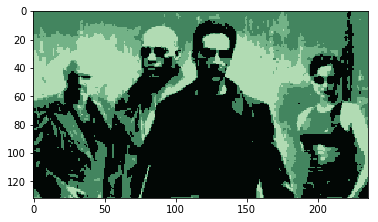

In [33]:
km = KM_IMG('img3.png') #实例化一个聚类对象
km.rand_center(5) #设置聚类中心个数
km.color_means() #进行聚类
km.dyeing() #显示聚类之后染色的图片